# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1374.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           5.32e-45
Time:                        09:03:41   Log-Likelihood:                 10.534
No. Observations:                  50   AIC:                            -13.07
Df Residuals:                      46   BIC:                            -5.420
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9632      0.070     71.259      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.48029259  4.98163016  5.43986421  5.82435218  6.11551027  6.30803095
  6.41175503  6.45005481  6.45599407  6.4668958   6.51821015  6.63769005
  6.84083149  7.12832756  7.4859546   7.8869091   8.29621142  8.67645288
  8.99394188  9.22423932  9.35617392  9.39367758  9.35513941  9.27038444
  9.17577346  9.10822904  9.09916926  9.16934579  9.32543448  9.55893851
  9.84758441 10.15898153 10.45594371 10.70259889 10.87028275 10.94224824
 10.91641698 10.80572084 10.63597718 10.44164717 10.26017393 10.1258307
 10.06408986 10.0874379  10.19332389 10.36457864 10.57223552 10.78028957
 10.95161308 11.05405551]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.05472007 10.90850164 10.63744983 10.29181296  9.93773546  9.64106346
  9.45122333  9.38912037  9.44202052  9.56666803]


## Plot comparison

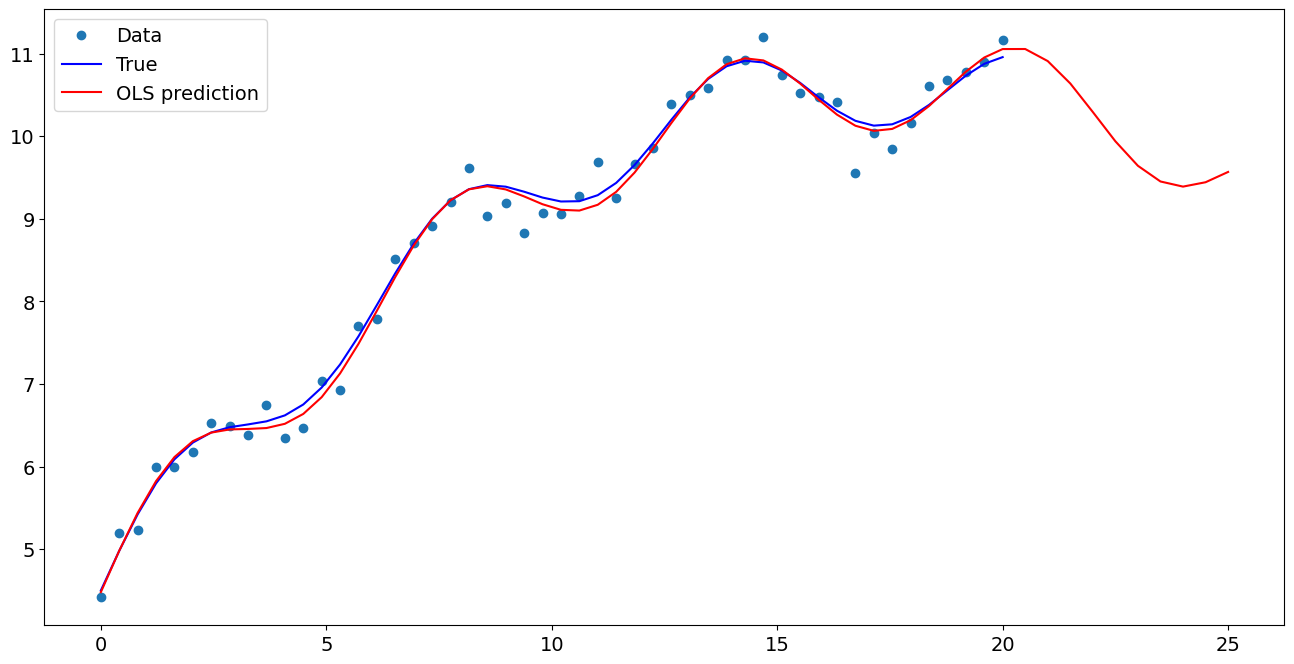

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.963247
x1                  0.496205
np.sin(x1)          0.562258
I((x1 - 5) ** 2)   -0.019318
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.054720
1    10.908502
2    10.637450
3    10.291813
4     9.937735
5     9.641063
6     9.451223
7     9.389120
8     9.442021
9     9.566668
dtype: float64